In [1]:
pip install tld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.8/263.8 kB 5.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from urllib.parse import urlparse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from urllib.parse import urlparse
from tld import get_tld
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import SVC

In [4]:
data = pd.read_csv('/content/drive/MyDrive/ML/malicious_phish.csv')

In [5]:
# Display unique values in the 'type' column before transformation
print("Unique values in the 'type' column before transformation:")
print(data['type'].unique())

# Rename 'malware', 'defacement', and 'phishing' to 'malicious'
data['type'] = data['type'].replace({'malware': 'malicious', 'defacement': 'malicious', 'phishing': 'malicious'})

# Display unique values in the 'type' column after transformation
print("\nUnique values in the 'type' column after transformation:")
print(data['type'].unique())

# Save the updated DataFrame if needed
updated_file_path = '/content/updated_malicious_phish.csv'
data.to_csv(updated_file_path, index=False)
print(f"\nUpdated dataset saved to: {updated_file_path}")


Unique values in the 'type' column before transformation:
['phishing' 'benign' 'defacement' 'malware']

Unique values in the 'type' column after transformation:
['malicious' 'benign']

Updated dataset saved to: /content/updated_malicious_phish.csv


type
benign       428103
malicious    223088
Name: count, dtype: int64


<ipython-input-6-7234b50513d1>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace(rem)


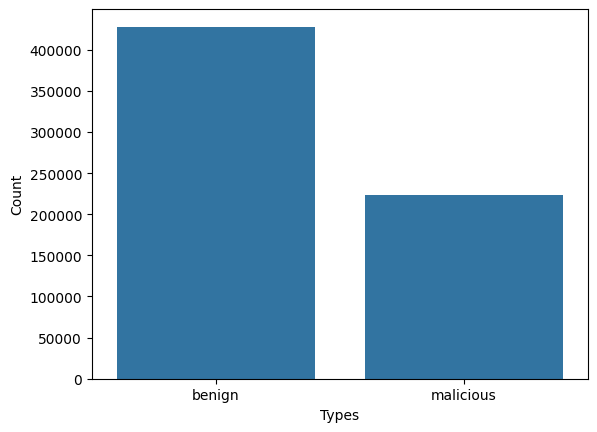

In [6]:
data = pd.read_csv('/content/updated_malicious_phish.csv')

count = data.type.value_counts()
print(count)
sns.barplot(x=count.index, y=count)
plt.xlabel('Types')
plt.ylabel('Count');

rem = {"Category": {"benign": 0, "malicious":1}}     #creating categories
data['Category'] = data['type']
data = data.replace(rem)

In [7]:
data = data.dropna(axis=0)
data.isna().sum()

,0
url,0
type,0
Category,0


In [8]:
#1
def url_length(url):
    return len(str(url))
data['url_len'] = data['url'].apply(lambda x: len(str(x)))

#2
def count_http(url):
    return url.count('http')
data['count-http'] = data['url'].apply(lambda i : count_http(i))

#3
def count_per(url):
    return url.count('%')
data['count%'] = data['url'].apply(lambda i : count_per(i))

#4
def count_ques(url):
    return url.count('?')
data['count?'] = data['url'].apply(lambda i: count_ques(i))

#5
def count_hyphen(url):
    return url.count('-')
data['count-'] = data['url'].apply(lambda i: count_hyphen(i))

#6
def count_equal(url):
    return url.count('=')
data['count='] = data['url'].apply(lambda i: count_equal(i))

#7
def hostname_length(url):
    return len(urlparse(url).netloc)
data['hostname_length'] = data['url'].apply(lambda i: hostname_length(i))

#8
def count_https(url):
    return url.count('https')
data['count-https'] = data['url'].apply(lambda i : count_https(i))

#9
def count_dot(url):
    count_dot = url.count('.')
    return count_dot
data['count.'] = data['url'].apply(lambda i: count_dot(i))

#10
def count_www(url):
    url.count('www')
    return url.count('www')
data['count-www'] = data['url'].apply(lambda i: count_www(i))

#11
def count_atrate(url):

    return url.count('@')
data['count@'] = data['url'].apply(lambda i: count_atrate(i))

#12
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')
data['count_dir'] = data['url'].apply(lambda i: no_of_dir(i))

#13
def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')
data['count_embed_domian'] = data['url'].apply(lambda i: no_of_embed(i))

#14
def fd_length(url):
    urlpath= urlparse(url).path
    try:
        return len(urlpath.split('/')[1])
    except:
        return 0
data['fd_length'] = data['url'].apply(lambda i: fd_length(i))

#15
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

data['digits']= data['url'].apply(lambda i: digit_count(i))

#16
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters

data['letters']= data['url'].apply(lambda i: letter_count(i))

#17
def Shortening_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0

data['Shortining_Service'] = data['url'].apply(lambda x: Shortening_Service(x))

#18
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0

data['having_ip_address'] = data['url'].apply(lambda i: having_ip_address(i))



In [9]:
data.head()

,url,type,Category,url_len,count-http,count%,count?,count-,count=,hostname_length,...,count.,count-www,count@,count_dir,count_embed_domian,fd_length,digits,letters,Shortining_Service,having_ip_address
0,br-icloud.com.br,malicious,1,16,0,0,0,1,0,0,...,2,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,35,0,0,0,0,0,0,...,2,0,0,2,0,5,1,29,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,31,0,0,0,0,0,0,...,2,0,0,3,0,7,1,25,0,0
3,http://www.garage-pirenne.be/index.php?option=...,malicious,1,88,1,0,1,1,4,21,...,3,1,0,1,0,9,7,63,0,0
4,http://adventure-nicaragua.net/index.php?optio...,malicious,1,235,1,0,1,1,3,23,...,2,0,0,1,0,9,22,199,0,0


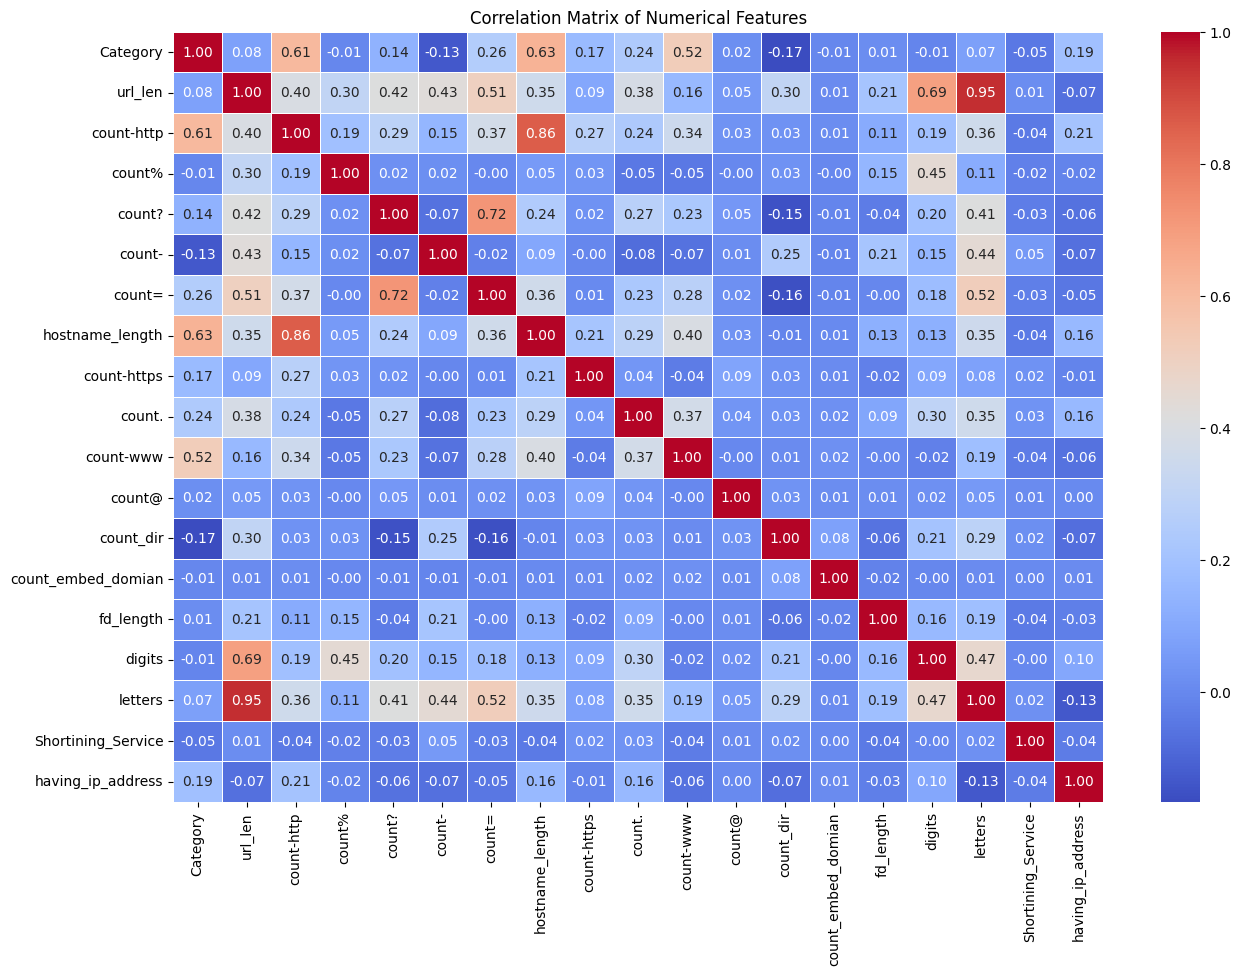

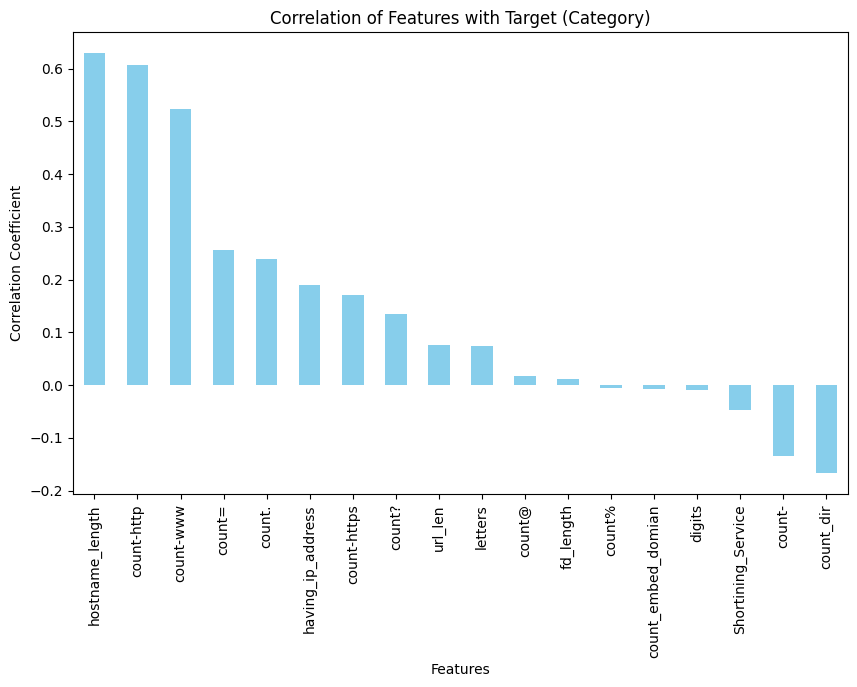

Feature Pairwise Independence Analysis (Pearson Correlation):

Correlation between hostname_length and count-http: 0.86, P-value: 0.00e+00
Correlation between hostname_length and count-www: 0.40, P-value: 0.00e+00
Correlation between hostname_length and count=: 0.36, P-value: 0.00e+00
Correlation between hostname_length and count.: 0.29, P-value: 0.00e+00
Correlation between count-http and count-www: 0.34, P-value: 0.00e+00
Correlation between count-http and count=: 0.37, P-value: 0.00e+00
Correlation between count-http and count.: 0.24, P-value: 0.00e+00
Correlation between count-www and count=: 0.28, P-value: 0.00e+00
Correlation between count-www and count.: 0.37, P-value: 0.00e+00
Correlation between count= and count.: 0.23, P-value: 0.00e+00


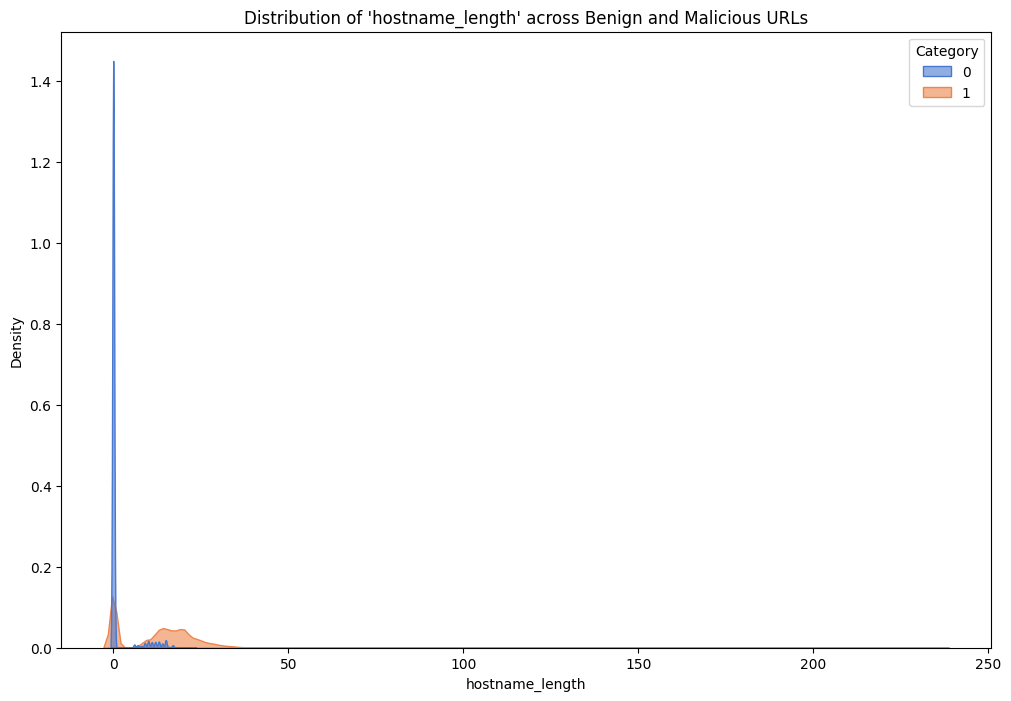

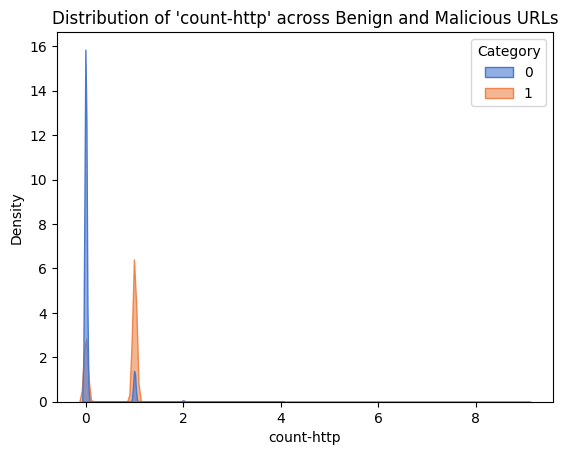

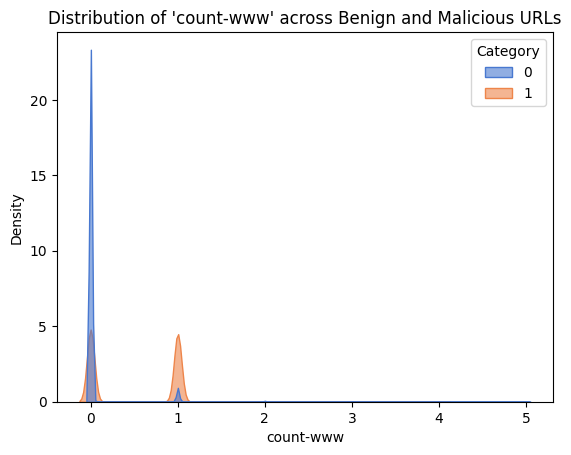

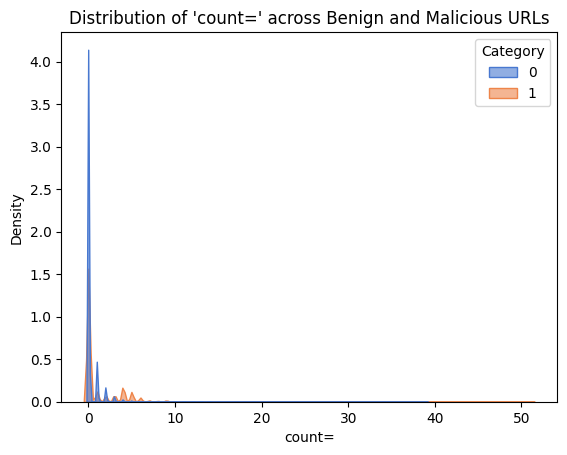

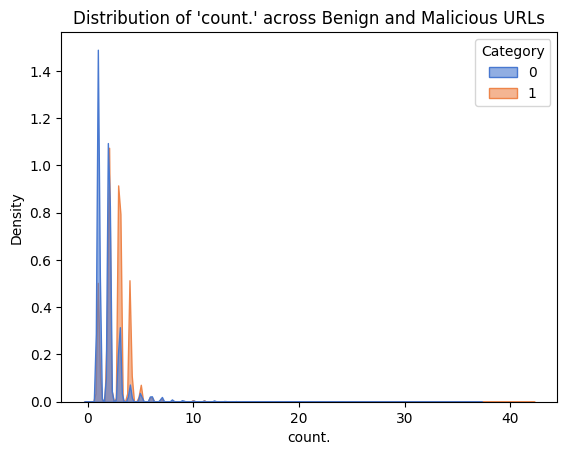


Potential redundant feature pairs (correlation > 0.8):
frozenset({'letters', 'url_len'})
frozenset({'count-http', 'hostname_length'})


In [10]:
# Exclude non-numeric columns (e.g., 'url') for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])

# Correlation matrix for numerical features
correlation_matrix = numeric_data.corr()

# Plot a heatmap to visualize correlations between numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# Analyzing correlation between features and the target variable (Category)
plt.figure(figsize=(10, 6))
correlation_with_target = correlation_matrix['Category'].drop('Category')
correlation_with_target.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Correlation of Features with Target (Category)")
plt.ylabel("Correlation Coefficient")
plt.xlabel("Features")
plt.show()

# Pairplot to examine relationships between top features and the target
# Select the top 5 features most correlated with the target
top_features = correlation_with_target.abs().sort_values(ascending=False).head(5).index.tolist()

# Pairplot visualization (using only numeric data and Category as target)
# sns.pairplot(data[numeric_data.columns.union(['Category'])], vars=top_features, hue='Category', diag_kind='kde', palette='husl', corner=True)
# plt.suptitle("Pairplot of Top Correlated Features with Target", y=1.02)
# plt.show()

# Test independence assumptions between selected feature pairs
from scipy.stats import pearsonr

# Calculate and print Pearson correlation coefficients for top feature pairs
print("Feature Pairwise Independence Analysis (Pearson Correlation):\n")
for i in range(len(top_features)):
    for j in range(i + 1, len(top_features)):
        feature1, feature2 = top_features[i], top_features[j]
        corr, p_value = pearsonr(data[feature1], data[feature2])
        print(f"Correlation between {feature1} and {feature2}: {corr:.2f}, P-value: {p_value:.2e}")

# Insights into numerical distributions per target class
plt.figure(figsize=(12, 8))
for feature in top_features:
    sns.kdeplot(data=data, x=feature, hue='Category', fill=True, common_norm=False, palette='muted', alpha=0.6)
    plt.title(f"Distribution of '{feature}' across Benign and Malicious URLs")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

# Identify potential redundant features (highly correlated pairs)
threshold = 0.8  # Define a high correlation threshold
redundant_features = []
for feature1 in numeric_data.columns:  # Iterate through numeric features
    for feature2 in numeric_data.columns:
        if feature1 != feature2 and abs(correlation_matrix.loc[feature1, feature2]) > threshold:
            redundant_features.append((feature1, feature2))
print("\nPotential redundant feature pairs (correlation > 0.8):")
for pair in set(frozenset(pair) for pair in redundant_features):
    print(pair)


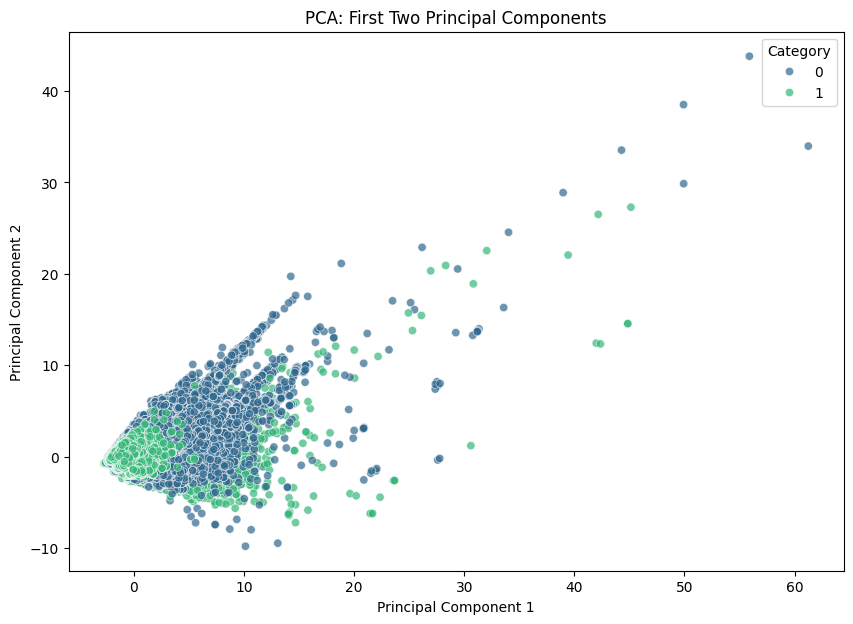

Explained Variance by PCA components: [0.23265325 0.11185935]


In [11]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Filter only numeric columns for dimensionality reduction
numeric_data = data.select_dtypes(include=[np.number])

# Separate features and target
X = numeric_data.drop(columns=['Category'], axis=1)
y = numeric_data['Category']

# Standardize the features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (Principal Component Analysis)
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X_scaled)

# Scatter plot of PCA components
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.7)
plt.title("PCA: First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Category", loc='best')
plt.show()

print(f"Explained Variance by PCA components: {pca.explained_variance_ratio_}")

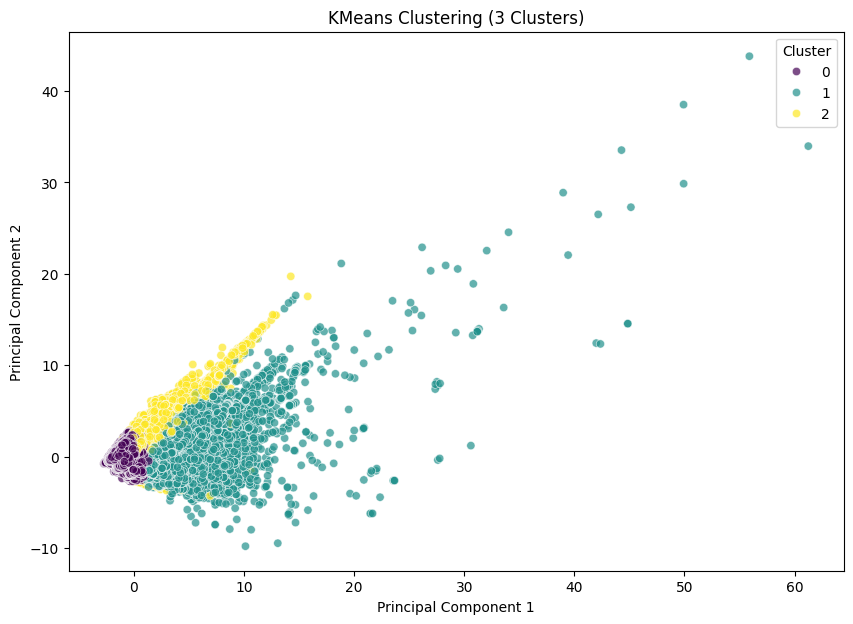

Cross-Validation Accuracy Scores: [0.89987638 0.90047452 0.90039006 0.90058201 0.89953009]
Mean Accuracy: 0.90 ± 0.00


In [20]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize the features for dimensionality reduction and clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---- Unsupervised Learning Technique: KMeans Clustering ----

# Perform KMeans clustering with an arbitrary number of clusters (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Visualize KMeans clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', alpha=0.7)
plt.title(f"KMeans Clustering (3 Clusters)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

In [21]:
# ---- Cross-Validation Strategy ----

# Define a Stratified K-Fold cross-validation strategy for future model evaluation
n_splits = 5
cv_strategy = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Example of applying cross-validation to a classifier (e.g., Logistic Regression)
from sklearn.linear_model import LogisticRegression

# Define a Logistic Regression model
model = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=cv_strategy, scoring='accuracy')

# Display cross-validation results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}")



Cross-Validation Accuracy Scores: [0.89987638 0.90047452 0.90039006 0.90058201 0.89953009]
Mean Accuracy: 0.90 ± 0.00


In [12]:
z = data.drop(['url','type'],axis=1)
X = data.drop(['url','type','Category'],axis=1)
y = data['Category']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


#############################################
######-Model => <class 'sklearn.tree._classes.DecisionTreeClassifier'> 
Test Accuracy :  96.64%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     85565
           1       0.96      0.94      0.95     44674

    accuracy                           0.97    130239
   macro avg       0.96      0.96      0.96    130239
weighted avg       0.97      0.97      0.97    130239

             Confusion_matrix 


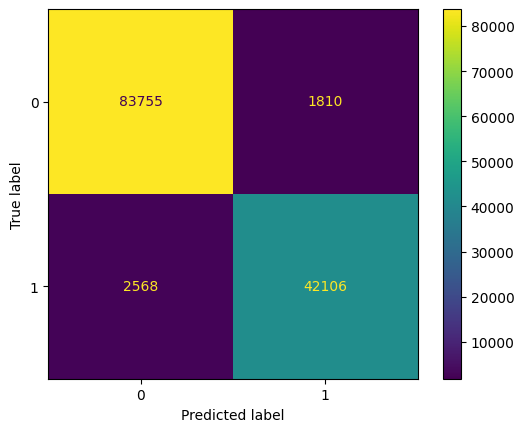

###################- End -###################
#############################################
######-Model => <class 'sklearn.naive_bayes.GaussianNB'> 
Test Accuracy :  87.61%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.93      0.91     85565
           1       0.85      0.78      0.81     44674

    accuracy                           0.88    130239
   macro avg       0.87      0.85      0.86    130239
weighted avg       0.87      0.88      0.87    130239

             Confusion_matrix 


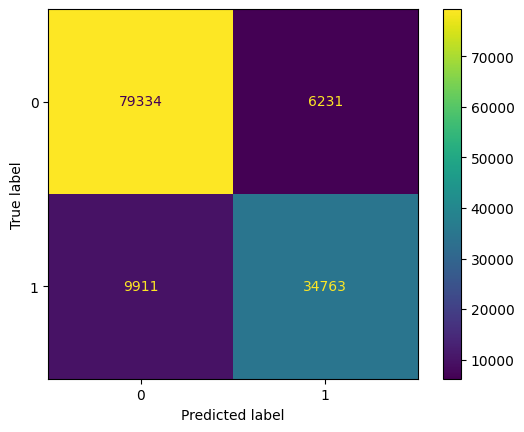

###################- End -###################
#############################################
######-Model => <class 'sklearn.linear_model._logistic.LogisticRegression'> 


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Accuracy :  90.04%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.89      0.96      0.93     85565
           1       0.91      0.78      0.84     44674

    accuracy                           0.90    130239
   macro avg       0.90      0.87      0.89    130239
weighted avg       0.90      0.90      0.90    130239

             Confusion_matrix 


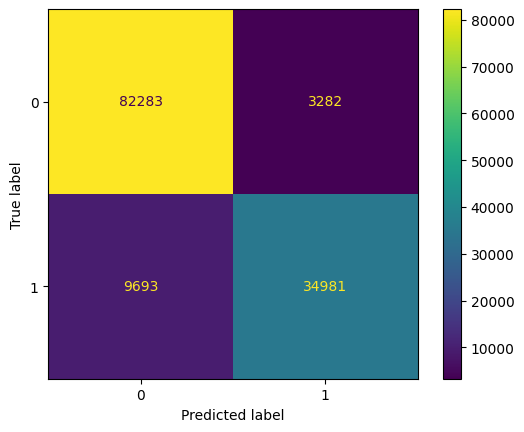

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.RandomForestClassifier'> 
Test Accuracy :  97.20%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85565
           1       0.97      0.95      0.96     44674

    accuracy                           0.97    130239
   macro avg       0.97      0.97      0.97    130239
weighted avg       0.97      0.97      0.97    130239

             Confusion_matrix 


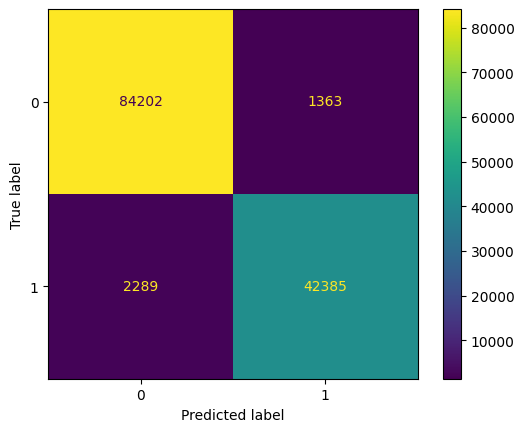

###################- End -###################
#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Test Accuracy :  97.17%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85565
           1       0.97      0.95      0.96     44674

    accuracy                           0.97    130239
   macro avg       0.97      0.97      0.97    130239
weighted avg       0.97      0.97      0.97    130239

             Confusion_matrix 


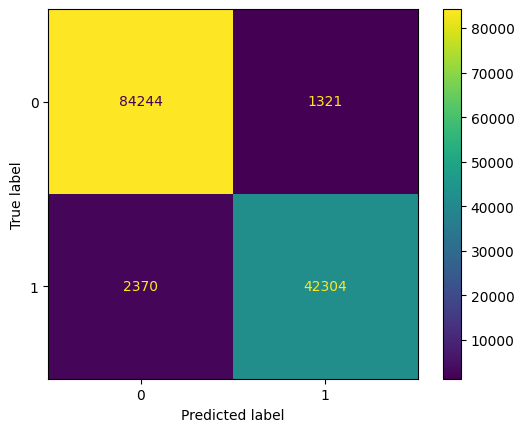

###################- End -###################


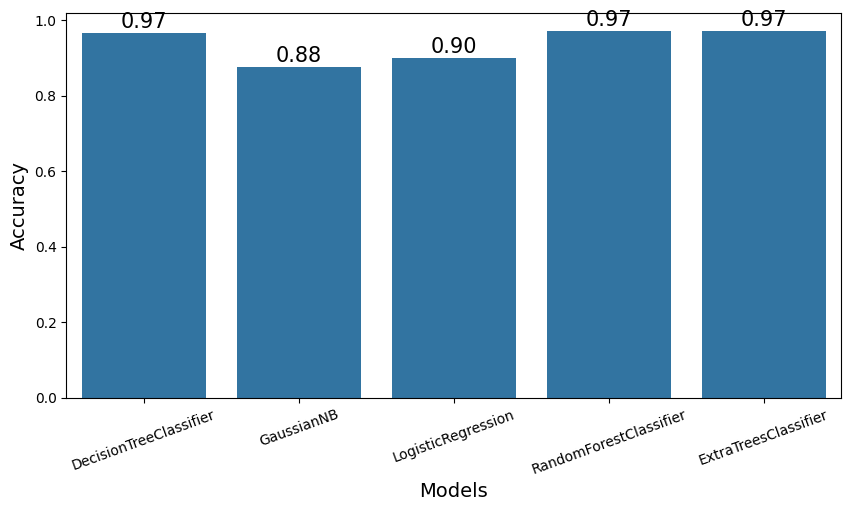

In [14]:
models = [DecisionTreeClassifier,GaussianNB, LogisticRegression, RandomForestClassifier, ExtraTreesClassifier]
accuracy_test=[]
for m in models:
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    #plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model_.classes_)
    disp.plot()
    plt.show()
    print('\033[31m###################- End -###################\033[0m')


output = pd.DataFrame({"Model":['DecisionTreeClassifier','GaussianNB', 'LogisticRegression', 'RandomForestClassifier', 'ExtraTreesClassifier'],
                       "Accuracy":accuracy_test})
output

plt.figure(figsize=(10, 5))
plots = sns.barplot(x='Model', y='Accuracy', data=output)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

plt.xlabel("Models", size=14)
plt.xticks(rotation=20);
plt.ylabel("Accuracy", size=14)
plt.show()

In [15]:
import time
start = time.time()

# insert some code to do something here

end = time.time()
print("Run time [s]: ",end-start)

Run time [s]:  3.886222839355469e-05


#############################################
######-Model => <class 'sklearn.ensemble._forest.ExtraTreesClassifier'> 
Run time [s]:  57.8724901676178
Test Accuracy :  97.16%  
              Classification_report 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     85565
           1       0.97      0.95      0.96     44674

    accuracy                           0.97    130239
   macro avg       0.97      0.97      0.97    130239
weighted avg       0.97      0.97      0.97    130239

             Confusion_matrix 


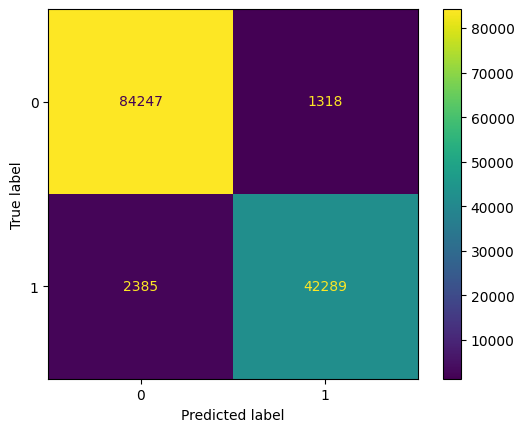

###################- End -###################


In [16]:
import time
models = [ExtraTreesClassifier]
accuracy_test=[]
for m in models:
    start = time.time()
    print('#############################################')
    print('######-Model =>\033[07m {} \033[0m'.format(m))
    model_ = m()
    model_.fit(X_train, y_train)
    end = time.time()
    pred = model_.predict(X_test)
    acc = accuracy_score(pred, y_test)
    accuracy_test.append(acc)
    print("Run time [s]: ",end-start)
    print('Test Accuracy :\033[32m \033[01m {:.2f}% \033[30m \033[0m'.format(acc*100))
    print('\033[01m              Classification_report \033[0m')
    print(classification_report(y_test, pred))
    print('\033[01m             Confusion_matrix \033[0m')
    cf_matrix = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=model_.classes_)
    disp.plot()
    #plot_ = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,fmt= '0.2%')
    plt.show()
    print('\033[31m###################- End -###################\033[0m')

In [17]:
import pickle
pickle.dump(model_,open('model.pkl','wb'))

In [18]:
def main(url):

    status = []

    status.append(url_length(url))
    status.append(count_http(url))
    status.append(count_per(url))
    status.append(count_ques(url))
    status.append(count_hyphen(url))
    status.append(count_equal(url))
    status.append(hostname_length(url))
    status.append(count_https(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(count_atrate(url))
    status.append(no_of_dir(url))
    status.append(no_of_embed(url))
    status.append(fd_length(url))
    status.append(digit_count(url))
    status.append(letter_count(url))
    status.append(Shortening_Service(url))
    status.append(having_ip_address(url))

    return status

def get_prediction_from_url(test_url):
    features_test = main(test_url)
    print(test_url)
    features_test = np.array(features_test).reshape((1, -1))
    pred = model_.predict(features_test)
    if int(pred[0]) == 0:

        res="BENIGN"
        return res

    else:

        res="MALICIOUS"
        return res


urls = ['https://malicious.com','khjds.afjs.afik','www.iit.edu','www.google.com','www.youtube.com']
for url in urls:
     print(get_prediction_from_url(url))

https://malicious.com
MALICIOUS
khjds.afjs.afik
MALICIOUS
www.iit.edu
BENIGN
www.google.com
BENIGN
www.youtube.com
BENIGN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but ExtraTreesClassifier was fitted with feature names
  warnings.warn(
